In [1]:
import networkx as nx
import nrw_graph as ng

# pandas ist eine Bibliothek für Python u.a. zur Verarbeitung von Daten.
import pandas as pd

# Bibliothek, z.B. um Daten graphisch darzustellen.
import matplotlib.pyplot as plt

In [2]:
df_staedte = pd.read_csv("stdt.txt", sep=",")

# Hier werden aus Gründen der Übersichtlichkeit 
# nur die ersten 10 Datensätze in einer Tabelle gezeigt.
display(df_staedte.head(10)) #

,Start,Ziel,Entfernung
0,KI,SN,160
1,KI,HH,97
2,KI,HB,211
3,HH,HB,126
4,SN,HH,110
5,HAM,MS,70
6,MS,HB,120
7,HB,H,127
8,HH,H,159
9,BI,H,90


In [15]:
# Ein neuer leerer Graph
autobahn = ng.nrw_graph()

zeilen = df_staedte.shape[0]
for i in range(zeilen):
#for i in range(7):    
    source = df_staedte.iloc[i]['Start']
    target = df_staedte.iloc[i]['Ziel']
    dist = float(df_staedte.iloc[i]['Entfernung'])

    autobahn.fuegeKanteHinzu(source, target, gewicht=dist)
    autobahn.deflagKnoten(source)
    autobahn.deflagKnoten(target)

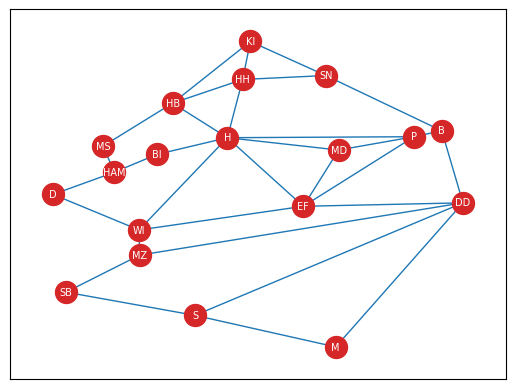

In [62]:
# explicitly set positions
pos = {'KI': (10.12, 54.32), 'SN': (11.40, 53.63), 
       'HH': ( 9.99, 53.55), 'HB': ( 8.80, 53.07), 
       'BI': ( 8.53, 52.03), 'H' : ( 9.73, 52.37), 
       'MD': (11.62, 52.12), 
#       'P' : (13.06, 52.39), # orig
       'P' : (12.90, 52.39), # verschoben
       'B' : (13.37, 52.51), 'D' : ( 6.77, 51.22), 
       'MZ': ( 8.24, 49.99), 
       'EF': (11.02, 50.98), 'DD': (13.73, 51.05), 
       'SB': ( 6.99, 49.24), 'S' : ( 9.18, 48.77), 
       'M' : (11.57, 48.13), 
#       'MS': ( 7.62, 51.96), # orig
#       'WI': ( 8.23, 50.07), # orig 
       'MS': ( 7.62, 52.20), # verschoben
       'WI': ( 8.23, 50.50), # verschoben 
      'HAM': (7.81, 51.67), }

node_options = {
    "node_color": "tab:red",
    "node_size": 250,
    "linewidths": 1,
                }
edge_options = {
    "edge_color": "tab:blue",
    "width": 1,
}

label_options = {
    "font_size": 7, 
    "font_color" : "white",
}


# nodes:
nx.draw_networkx_nodes(autobahn, pos, **node_options)

# edges:
nx.draw_networkx_edges(autobahn, pos, **edge_options)

# labels:
nx.draw_networkx_labels(autobahn, pos, **label_options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
#ax.margins(0.1)
plt.axis("on")
plt.show()
